# CO$_2$ Levels After GRETA

This kernel plots the CO$_2$  levels in the critical years after the students-led 15 March 2019 **Global Response to Extreme Temperature Anomalies** (GRETA) to look at progress toward [Mission 2020](http://www.mission2020.global/) and the 1.5 C [Paris Agreement](https://unfccc.int/process-and-meetings/the-paris-agreement/the-paris-agreement) goal.

The NOAA ESRL Mauna Loa CO$_2$ measurements ([details](https://www.esrl.noaa.gov/gmd/ccgg/about/co2_measurements.html)) from the most recent weekly [NOAA Mauna Loa Data](https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html) are read in, and they are fit with a simple model that combines a secular trend (linear and quadratic) and a yearly periodic component (using 5 harmonics). The measurements from the 10 years pre-GRETA (2009.20 to 2019.20) are fit to determine parameters of the "**Business As Usual**" (BAU) model.

Note that the BAU model is fixed and does not change as new (post-GRETA) data points are added: here it is being used as a reference "line in the sand" to assess climate emergency progress. This BAU trajectory is not something to stay on: BAU CO$_2$  will be **over 500 ppm by 2045**.

Several variations of plots are made. For example, in the "weeks" plot, the data and model are shown since Week 1 of Greta Thunberg's school strikes, extending into the post-GRETA period through 2020 with some key events marked. Comparing the new data values (green) with the fixed business-as-usual model ("salmon" color) will give an answer to the question: "Is the microphone is on?"

#### What will appropriate progress look like?
A simple model of a desired CO$_2$ trajectory is also plotted (bright green), based on the [IPCC Special Report](https://www.ipcc.ch/sr15/) pathways that remain below 1.5 deg C with "no or limited overshoot". These models have emissions that "decline by about 45% from 2010 levels by 2030" (essentially pathway P2 which is -47%), i.e., **actual global emissions decreasing by about 6.7% per year from 2020 to 2030**.

To estimate the change in CO$_2$ concentration in this case, the [BernSCM](https://www.geosci-model-dev.net/11/1887/2018/gmd-11-1887-2018.html) simulator was used and suggests that the CO$_2$ ppm/yr fractional rate of change will be around 2x the fractional rate of change of the emissions; this effect is included in the modeled "IPCC 1.5 deg." CO$_2$  curves on the plots. Very similar results are also given by the [C-ROADS](https://croadsworldclimate.climateinteractive.org/) simulator run in global mode with a 6.7 %/yr reduction starting in 2020.

The IPCC-SR15 CO$_2$ curve is only 0.5 ppm below BAU at the end of 2020; it's a more significant **1.2 ppm below BAU** at the end of 2021; and at the end of 2022 we should have clearly left the BAU curve and be **2.3 ppm below BAU**.

#### What to do? Are we doing it?

The P2 path requires **immediate, actual, and on-going Emissions Reductions**.

The COVID-19 pandemic has lead to some decrease in emissions which may be appearing in the CO 2  curve as a continued departure below BAU... or not? The challenge is to come out of COVID-19 in ways that continue emissions reductions in line with the IPCC 1.5 deg. goal.

In [1]:
# A few preliminaries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# useful constant
DAYS_YR = 365.0

# Month labels
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

## Get and Setup the Weekly Data

In [2]:
# Weekly CO2 ppm file is linked on the page:  https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html

##co2_file = "ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_weekly_mlo.txt"
# The last day (Saturday) included in weekly measurements (six days after the most recent date tabulated.)
##co2_file_date = '7Nov2020'  

# Or use a saved version in the CO2 Mauna Loa Weekly dataset
co2_file_date = '7Nov2020'
co2_file = "co2_weekly_mlo.txt"

In [3]:
# Dates related to GT and major strikes
#
# GT school strike week 1, Friday 24 Aug 2018, day 236
yr_GTwk1 = 2018.0+(236.0-0.5)/DAYS_YR

# The first GRETA, 15 March 2019, day 74
yr_GRETA = 2019.0 + (74.0-0.5)/DAYS_YR

# subsequent GRETA's:
# 3 May 2019, day 123 (more Canada, USA involvement)
yr_GRETA_mini = 2019.0 + (123.0-0.5)/DAYS_YR
# GRETA-2, 24 May 2019, day 144 
yr_GRETA_2 = 2019.0 + (144.0-0.5)/DAYS_YR
# The general global strikes:
# GRETA-General, 20[-27] September 2019, day 263 
yr_GRETA_General = 2019.0 + (263.0-0.5)/DAYS_YR
# The second general global strike, before COP 25:
# GRETA-General-2, 29 Nov 2019, day 333 
yr_GRETA_COP25 = 2019.0 + (333.0-0.5)/DAYS_YR
# GRETA: Global Day of Climate Action, 25 Sept. 2020
yr_GRETA_GDCA = 2020.0 + (269.0-0.5)/DAYS_YR

# Other dates of note are in the code for the "weekly" or "future" plots, below;
# e.g., COP26 in Nov. 2021.

In [4]:
# Dates that select the "BAU" data to fit and how far to extrapolate

# Choose a starting time for fitting/analysis
yr_start = yr_GRETA - 10.0

# Choose to fit the data up until the first GRETA:
yr_fit = yr_GRETA

# and extrapolate to some further time
yr_end = yr_GRETA + 5.0

In [6]:
# Read the weekly CO2 data
df_co2 = pd.read_csv(co2_file, sep='\s+', comment='#', header=None,
            usecols=[0,1,2,3,4,5,6,7],
            names=['year','mm','dd','time','CO2_ppm','days','CO2_1yr','CO2_10yr'])
# Note: the decimal "time" in the file is the middle of the first day of the week;
#       add 3 days to it to be the middle of the week ...picky,picky...
df_co2['time'] = df_co2['time'] + 3.0/DAYS_YR

# Down-select to keep just data from the desired starting time
df_co2 = df_co2[df_co2['time'] > yr_start]


print("\nRead in the CO2 data in desired range:\n")
print(df_co2.head(6))
print( 6*"   . . .  ")
print(df_co2.tail(6))

# Are there any missed data points in the range?
df_gaps = df_co2[df_co2['CO2_ppm'] < 0.0]
# Patch them using the previous point and their 1 year ago values...
for indx in df_gaps.index:
    df_co2.loc[indx,'CO2_ppm'] = (df_co2.loc[indx-1,'CO2_ppm'] - df_co2.loc[indx-1,'CO2_1yr']) + \
        df_co2.loc[indx,'CO2_1yr']
print("\nPatched {} data points in this range.\n".format(len(df_gaps)))


Read in the CO2 data in desired range:

      year  mm  dd         time  CO2_ppm  days  CO2_1yr  CO2_10yr
1817  2009   3  15  2009.209619   388.20     7   385.82    370.18
1818  2009   3  22  2009.228719   389.29     6   386.66    370.76
1819  2009   3  29  2009.247919   389.04     7   387.84    370.48
1820  2009   4   5  2009.267119   389.43     7   387.07    371.79
1821  2009   4  12  2009.286319   388.93     6   386.43    371.37
1822  2009   4  19  2009.305519   389.56     7   386.55    370.26
   . . .     . . .     . . .     . . .     . . .     . . .  
      year  mm  dd         time  CO2_ppm  days  CO2_1yr  CO2_10yr
2419  2020   9  27  2020.747319   411.06     7   407.97    386.77
2420  2020  10   4  2020.766419   411.05     7   408.33    386.98
2421  2020  10  11  2020.785519   411.12     7   408.57    386.86
2422  2020  10  18  2020.804619   411.52     6   408.73    387.54
2423  2020  10  25  2020.823819   411.48     7   409.21    387.83
2424  2020  11   1  2020.842919   411.76

In [7]:
# Augment the dataframe to go to the extrapolated time, yr_end.
# Calculate the number of weeks to add
last_index = df_co2.index[-1]
last_time = df_co2.loc[last_index, 'time']
week_yr = (7.0/DAYS_YR)
more_weeks = int((yr_end - last_time)/week_yr)
more_rows = []
# and create the augmented dataframe
df_co2_aug = df_co2.copy()
for iadd in range(1, more_weeks+1):
    new_time = last_time + iadd*week_yr
    df_co2_aug = df_co2_aug.append(pd.DataFrame([{'year': int(new_time),
                                                  'mm': 0,
                                                  'dd': 0,
                                                  'time': new_time}]), sort=False)

# Reset the index, drop the old index, and replace df_co2 with the augmented version:
df_co2 = df_co2_aug.reset_index().drop('index',axis=1)

# Add a yr_phase column:
df_co2['yr_phase'] = df_co2['time']-df_co2['time'].astype(int)

In [8]:
# Include GTweek numbers as well

# Find the index of the first school-strike week (it should be the week starting Sunday 19 Aug 2018).
# The "time" is mid-week so subtract some days from the Friday and use that week:
wk1_index = (df_co2.index[df_co2['time'] > (yr_GTwk1 - 4/DAYS_YR)])[0]

# Put GT-week numbers in the dataframe
df_co2['GTwk'] = 0
for wkind in range(wk1_index,len(df_co2)):
    df_co2.loc[wkind,'GTwk'] = 1 + df_co2.loc[wkind-1,'GTwk']
    
# GT-week-72 Friday is just into 2020, check it with:
##df_co2[df_co2['time'] > 2019.95].head(5)

# Show the dataframe columns around the start of the GT school strikes
df_co2[abs(df_co2['time'] - yr_GTwk1) < 30.0/DAYS_YR ]

,year,mm,dd,time,CO2_ppm,days,CO2_1yr,CO2_10yr,yr_phase,GTwk
488,2018,7,22,2018.563019,408.28,7.0,406.78,385.96,0.563019,0
489,2018,7,29,2018.582219,407.46,6.0,406.49,385.07,0.582219,0
490,2018,8,5,2018.601419,407.23,7.0,405.55,385.09,0.601419,0
491,2018,8,12,2018.620519,407.07,7.0,405.39,383.90,0.620519,0
492,2018,8,19,2018.639719,406.84,7.0,404.53,383.57,0.639719,1
493,2018,8,26,2018.658919,406.11,7.0,404.27,383.28,0.658919,2
494,2018,9,2,2018.678119,405.49,7.0,403.92,383.48,0.678119,3
495,2018,9,9,2018.697219,405.39,7.0,403.57,383.05,0.697219,4
496,2018,9,16,2018.716419,405.69,7.0,403.16,383.32,0.716419,5


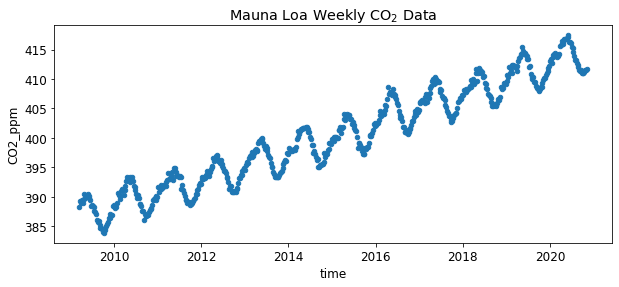

In [38]:
# Set the font size for plots
plt.rcParams.update({'font.size': 12})

# A quick plot of the data (only where available)
df_co2.plot.scatter('time','CO2_ppm',figsize=(10,4))
plt.title('Mauna Loa Weekly CO$_2$ Data')
plt.show()

## Fit a Simple Model to the Data

The Business-As-Usual model is made by fitting the $\text{CO}_2$ data with a secular component and a set of sin,cos harmonics for the seasonal, periodic, components. The secular component is a simple 3 parameter quadratic: $ax^2 + bx + c$, with $c$ the intercept, $b$ the linear term, ppm/yr, and $2a$ the "acceleration" of the slope, ppm/yr/yr.

Note that this model does not change, so all of this could be replaced by creating and reading-in a "BAU(2019)" model file.

In [15]:
# Use linear regression from the scikit-learn machine learning collection:
from sklearn.linear_model import LinearRegression

# The above routine was chosen since I'd been recently steeped in machine learning things.
# A more typical (and function-flexible) approach would be to use least squares fitting,
# e.g., curve_fit from scipy.optimize, as used by Adams at:
# https://piphase.wordpress.com/2019/06/03/climate-data-fourier-analysis/

In [16]:
# Setup the usual ML X,y data sets, includes future weeks as well
X = pd.DataFrame(df_co2[['time','yr_phase']])
y = pd.DataFrame(df_co2['CO2_ppm'])

# Add trend and periodic features to use in fitting

# Polynomial time functions, degree 1 to 5
# expand around yr_fit, use just linear and quadratic
time_ref = yr_fit
X['time1'] = (X['time'] - time_ref)
X['time2'] = (X['time'] - time_ref)**2

# Yearly shape
X['sin_t'] = np.sin(2.0*np.pi*X['yr_phase'])
X['cos_t'] = np.cos(2.0*np.pi*X['yr_phase'])
X['sin_2t'] = np.sin(4.0*np.pi*X['yr_phase'])
X['cos_2t'] = np.cos(4.0*np.pi*X['yr_phase'])
X['sin_3t'] = np.sin(6.0*np.pi*X['yr_phase'])
X['cos_3t'] = np.cos(6.0*np.pi*X['yr_phase'])
X['sin_4t'] = np.sin(8.0*np.pi*X['yr_phase'])
X['cos_4t'] = np.cos(8.0*np.pi*X['yr_phase'])
X['sin_5t'] = np.sin(10.0*np.pi*X['yr_phase'])
X['cos_5t'] = np.cos(10.0*np.pi*X['yr_phase'])
# Remove the phase and the time columns (time1 replaces time in fitting)
X = X.drop(['yr_phase','time'],axis=1).copy()

# Use simple linear regression
model = LinearRegression()

# Do the fitting on a limited time-range of the data
# Get the data to use for fitting, up to yr_fit:
fit_rows = df_co2['time'] < yr_fit
Xfit = X[fit_rows].copy()
yfit = y[fit_rows].copy()

# and do the fit
fit_model = model.fit(Xfit, yfit)

# The R^2 is very close to 1.00:
score = fit_model.score(Xfit, yfit)
print("The fit has R^2 = {:.4f}".format(score))

The fit has R^2 = 0.9942


In [17]:
# Put the model values in the original dataframe:
df_co2['BAU_ppm'] = fit_model.predict(X)

# along with residuals
df_co2['CO2_resid'] = df_co2['CO2_ppm'] - df_co2['BAU_ppm']

# and the model residual, i.e., zeros (for plotting)
df_co2['BAU_resid'] = 0.0

# Get the coefficients and intercept
cols = X.columns
coeffs = fit_model.coef_
intercept = fit_model.intercept_[0]
linear_coeff = coeffs[0,0]
ppmyryr_coeff = 2.0*coeffs[0,1]

# Show some useful values
print("\nThe model coefficients at {:.2f} are:\n".format(time_ref))
print("  Intercept:  {:.2f}".format(intercept))
print("     Linear:  {:.3f} ppm/yr".format(linear_coeff))
# multiply the quadratic coef by 2 to get the "acceleration": 
print(" dLinear/dt:  {:.3f} ppm/yr/yr".format(ppmyryr_coeff))

# The peak value in May 2020
print("  2020 Peak:  {:.2f}".format(df_co2.loc[(df_co2['time'] < 2020.50), "BAU_ppm"].max()))

print("\nThe periodic sin,cos coeff.s are:\n", list(cols[2:]), "\n", coeffs[0,2:])


The model coefficients at 2019.20 are:

  Intercept:  410.79
     Linear:  2.702 ppm/yr
 dLinear/dt:  0.061 ppm/yr/yr
  2020 Peak:  417.39

The periodic sin,cos coeff.s are:
 ['sin_t', 'cos_t', 'sin_2t', 'cos_2t', 'sin_3t', 'cos_3t', 'sin_4t', 'cos_4t', 'sin_5t', 'cos_5t'] 
 [ 2.93191855 -0.84923675 -0.62204405  0.70322272 -0.05222729  0.08967806
  0.06006132 -0.09836503  0.01810705 -0.01862552]


In [18]:
# Create Data and Model columns with just secular or just periodic components

# Evaluate the model without the periodic terms:
df_co2['BAU_secular'] = intercept
for tpow in [1, 2]:
    df_co2['BAU_secular'] += X['time'+str(tpow)]*coeffs[0,tpow-1]
    
# Just the periodic part of the model, i.e., subtracting off the BAU_secular
df_co2['BAU_periodic'] = df_co2['BAU_ppm'] - df_co2['BAU_secular']

# Data: Create the secular ("deseasoned") Data, i.e., without periodic terms
df_co2['CO2_secular'] = df_co2['BAU_secular'] + df_co2['CO2_resid']

# Data: and the periodic Data without the secular terms:
df_co2['CO2_periodic'] = df_co2['BAU_periodic'] + df_co2['CO2_resid']

In [19]:
# Variation of the model parameters with the number of years fit...
#          Prediction at 2020 peak is in any case between 416 - 418
#  3:  410.61  2.93 ppm/yr.  0.25 ppm/yr/yr  0.9702  2020: 417.87  <-- upper
#  5:  410.44  2.26 ppm/yr. -0.06 ppm/yr/yr  0.9813  2020: 416.56  <-- lower
#  7:  410.64  2.55 ppm/yr.  0.01 ppm/yr/yr  0.9896  2020: 417.13
# 10:  410.79  2.70 ppm/yr.  0.03 ppm/yr/yr  0.9942  2020: 417.39  <-- use this as nominal
# 13:  410.88  2.77 ppm/yr.  0.04 ppm/yr/yr  0.9963  2020: 417.52
# 15:  410.74  2.69 ppm/yr.  0.03 ppm/yr/yr  0.9970  2020: 417.26
# 20:  410.40  2.53 ppm/yr.  0.02 ppm/yr/yr  0.9979  2020: 416.59
# 30:  410.57  2.57 ppm/yr.  0.02 ppm/yr/yr  0.9986  2020: 416.80
# 40:  409.93  2.43 ppm/yr.  0.02 ppm/yr/yr  0.9987  2020: 415.95

# Very approximate range of the model around the nominal 10-year fit:
model_std = 0.50

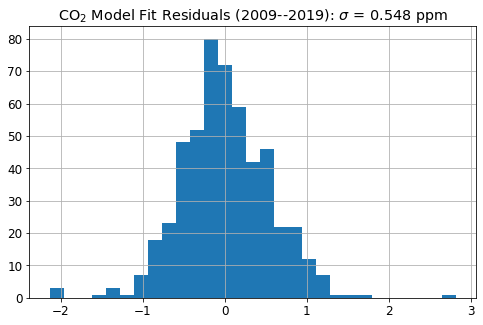

In [39]:
# Calculate the standard deviation of the fit residuals
df_stats = df_co2[fit_rows].describe()
resid_std = df_stats.loc['std','CO2_resid']
# Look at the distribution of the weekly residuals from the fit:
df_co2[fit_rows].hist(['CO2_resid'], bins='auto', figsize=(8,5))
plt.title("CO$_2$ Model Fit Residuals ({}--{}): $\sigma$ = {:.3f} ppm".format(int(yr_start), int(yr_fit), resid_std))
plt.show()

## Calculate the IPCC SR15 Future CO$_2$ Levels

The desired IPCC SR15 future curve is the same as the BAU model until 15 March 2019: at this time the "acceleration" of the rate, the ppm/yr/yr value, is changed to be the desired (negative) value -- i.e., some brakes are put on, producing a deceleration.

The comments in the next cell are simply to explain how/why I arrived at using -0.288 ppm/yr/yr as the "acceleration" for the SR15 model.

In [21]:
# The IPCC Special Report "Global Warming of 1.5 C" suggests emissions paths with
# "no or limited overshoot" will have 2030 emissions ~45% below 2010 levels.

# The ppm/yr/yr (curvature) parameter is changed from its BAU value (~ +0.061) and
# set to a constant negative value to model the expected-desired future CO2 values.
# With this constant "deceleration", the model gives a parabolic CO2 concentration curve,
# i.e., a linear change in CO2 rate with time.
# The ppm/yr/yr is simply calculated by specifying:
#    i) yr_reduced = the year when the ppm/yr is to be reduced and
#   ii) reduced_fraction = the factor by which it is multiplied at that year.
# With "linear_coeff" the starting ppm/yr value (i.e., 2.701 at yr_fit),
# the desired ppm/yr/yr is then:
#    new_ppmyryr = (reduced_fraction - 1)*linear_coeff/(yr_reduced - yr_fit)
#
# [Note: In v51 and earlier versions, two "schemes" to model the expected CO2
#  change were described here.
#  In version v52 and following, only the correct "Scheme 2" is described.]
#
#
# How will CO2 change when emissions are following IPCC SR15?
#
# I used the BernSCM simulator to make a very simple model of emissions which have the
# IPCC "-45% of 2010 in 2030" level in the forcing function (for "fossil_CO2_em"),
# specifically:
#    2010 emissions: 8.46 GtC/yr
#    2020 emissions: 9.40
#    2025 emissions: 6.63
#    2030 emissions: 4.653    <-- This is 0.55 of the 2010 8.46 value.
# The *emissions* reduction per year from 2020 to 2025 is about -6.7% per year.
#
# What is the predicted ppm change in this case?
# The BernSCM output gives these ppm/yr values at the dates:
#          ppm/yr
#    2020  2.71
#    2025  1.27
#    2030  0.39 
# Focusing on the near term, from 2020 to 2025,
# the ppm/yr changes by a factor of 1.27/2.71 = 0.469, or an exponential factor of 0.859 per year.
# The *CO2* change is about -14.1 %/yr, roughly twice the emissions change.

# So to get the expected-desired ppm/yr/yr, use parameters:
yr_reduced = yr_GRETA + 5.0   # reduction in 5 years
reduced_fraction = 0.859**5   # reduced x0.469 in five years

# Use these values to calculate the needed ppm/yr/yr.
# Note "linear_coeff" is the starting ppm/yr value ~ 2.701. 
new_ppmyryr = (reduced_fraction - 1)*linear_coeff/(yr_reduced - yr_fit)

print("\nSetting dLinear/dt to {:.3f} ppm/yr/yr ".format(new_ppmyryr) +
     "to decrease the ppm/yr rate to {:.1f}% of its value at {:.2f}\n".format(
         100.0*reduced_fraction, yr_reduced))

# Because the model is quadratic there is a *constant* absolute change
# in the ppm/yr rate from year to year; this is the -0.288 value of ppm/yr/yr.
# This means that the *fractional* change in ppm/yr is not constant for this model;
# this the case in the IPCC SR 1.5 where pathways have their emissions from
# 2020 to 2030 decreasing along a straight line, rather than an exponential.
print("The percent change in ppm/yr varies with the year, some examples:")
print("= {:.2f}% in first year,".format(100.0*new_ppmyryr/linear_coeff))
print("= {:.2f}% in fifth year.".format(100.0*new_ppmyryr/(linear_coeff+4.0*new_ppmyryr)))


Setting dLinear/dt to -0.288 ppm/yr/yr to decrease the ppm/yr rate to 46.8% of its value at 2024.20

The percent change in ppm/yr varies with the year, some examples:
= -10.65% in first year,
= -18.54% in fifth year.


In [22]:
# Calculate the SR15 model values

# Generate the SR15 secular term
df_co2['SR15_secular'] = intercept
df_co2['SR15_secular'] += X['time1']*linear_coeff
# Include a factor of 0.5 in the quadratic coeff. (i.e., as in physics: (1/2)at^2 )
df_co2['SR15_secular'] += X['time2']*0.5*new_ppmyryr

# A version including the periodic model component
df_co2['SR15_ppm'] = df_co2['SR15_secular'] + df_co2['BAU_periodic']

# And create the "residual" of the SR15 and BAU model:
df_co2['SR15_resid'] = df_co2['SR15_ppm'] - df_co2['BAU_ppm']

# Create the SR15_periodic to be SR15_ppm minus BAU_secular:
# this is analogous to BAU_periodic which gives the BAU model minus the BAU secular term.
df_co2['SR15_periodic'] = df_co2['SR15_ppm'] - df_co2['BAU_secular']

In [27]:
# Output and check the SR15 model ppm and ppm/dt at some time in future
this_yr = 2021.20   # two years from GRETA

# Show all the df values at this_yr and the following week:
##print((df_co2[df_co2['time'] > this_yr]).head(2))

# Calculate the ppm/yr values for BAU and SR15 models:
one_week = (df_co2[df_co2['time'] > this_yr]).iloc[0]
next_week = (df_co2[df_co2['time'] > this_yr]).iloc[1]

bau_ppmyr = (next_week['BAU_secular']- one_week['BAU_secular'])/(next_week['time']- one_week['time'])
sr15_ppmyr = (next_week['SR15_secular']- one_week['SR15_secular'])/(next_week['time']- one_week['time'])

# Calculate the ppm/yr/yr values too
bau_ppmyryr = (bau_ppmyr - linear_coeff)/(this_yr - yr_fit)
sr15_ppmyryr = (sr15_ppmyr - linear_coeff)/(this_yr - yr_fit)

print("Check the models at t =",this_yr,":")
print("          ppm     ppm/yr   ppm/yr/yr")
print(" BAU:   {:.3f}    {:.3f}    +{:.3f}".format(one_week['BAU_ppm'], bau_ppmyr, bau_ppmyryr))
print("SR15:   {:.3f}    {:.3f}    {:.3f}".format(one_week['SR15_ppm'], sr15_ppmyr, sr15_ppmyryr))

Check the models at t = 2021.2 :
          ppm     ppm/yr   ppm/yr/yr
 BAU:   417.866    2.825    +0.062
SR15:   417.164    2.122    -0.290


### The newest data point values

In [29]:
# determine the time, etc of the newest measurement
yr_newest = max(df_co2.loc[df_co2['CO2_ppm'] > 0.0,'time'])
newest_row = (df_co2[df_co2['time'] > (yr_newest - 0.001)]).iloc[0]
# and one year before that
yr_ago_row = (df_co2[df_co2['time'] > (yr_newest - 1.001)]).iloc[0]

# get specific newest values
GTwk_newest = int(newest_row['GTwk'])
ppm_newest = newest_row['CO2_ppm']
bau_newest = newest_row['BAU_ppm']
sr15_newest = newest_row['SR15_ppm']
secular_newest = newest_row['CO2_secular']
resid_newest = newest_row['CO2_resid']
phase_newest = newest_row['yr_phase']
periodic_newest = newest_row['CO2_periodic']

print("\nMost recent data point is ("+
      "{:.2f}, {:.2f}) for GT week {}.".format(yr_newest, ppm_newest, GTwk_newest))
print("{:.2f} ppm from current BAU ({:.2f}).".format(resid_newest,bau_newest))

# some yr_ago values:
bau_yr_ago = yr_ago_row['BAU_ppm']
yr_ago_time = yr_ago_row['time']
# 1 year increase, measured from BaU a year ago:
since_yr_ago = ppm_newest - bau_yr_ago
print("+{:.2f} ppm from BAU of 1-year-ago ({:.2f}).  ".format(since_yr_ago, bau_yr_ago) )


Most recent data point is (2020.84, 411.76) for GT week 116.
-0.97 ppm from current BAU (412.73).
+1.69 ppm from BAU of 1-year-ago (410.07).  


In [30]:
newest_row

year             2020.000000
mm                 11.000000
dd                  1.000000
time             2020.842919
CO2_ppm           411.760000
days                6.000000
CO2_1yr           409.860000
CO2_10yr          388.030000
yr_phase            0.842919
GTwk              116.000000
BAU_ppm           412.731426
CO2_resid          -0.971426
BAU_resid           0.000000
BAU_secular       415.303365
BAU_periodic       -2.571938
CO2_secular       414.331938
CO2_periodic       -3.543365
SR15_secular      414.833561
SR15_ppm          412.261622
SR15_resid         -0.469804
SR15_periodic      -3.041743
Name: 607, dtype: float64

## Simple Plots of the Data and Models

In [31]:
# Colors for components
fit_data_clr = 'blue'
new_data_clr = 'green'
bau_model_clr = 'salmon'
sr15_model_clr = 'limegreen'
met_ppm_clr = 'darkorange'

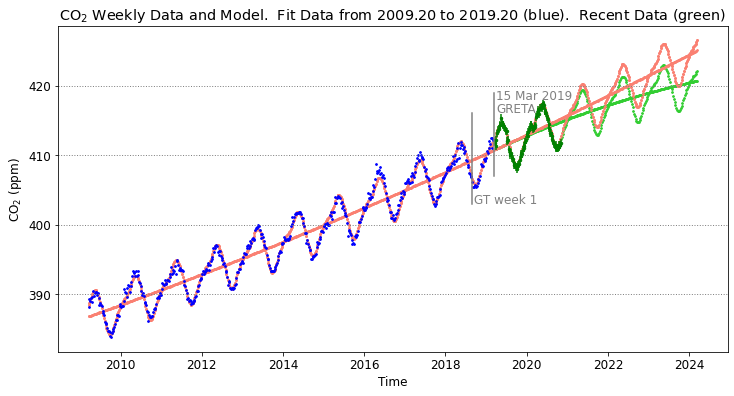

In [41]:
# Overview Plot

# The models
ax = df_co2.plot.scatter('time','BAU_ppm',c=bau_model_clr,s=3,figsize=(12,6))
# The SR15 secular trend
df_co2[~fit_rows].plot.scatter('time','SR15_secular',c=sr15_model_clr,s=3,ax=ax)
# The SR15 full model
df_co2[~fit_rows].plot.scatter('time','SR15_ppm',c=sr15_model_clr,s=3,ax=ax)
# BAU on top
df_co2.plot.scatter('time','BAU_secular',c=bau_model_clr,s=3,ax=ax)
df_co2.plot.scatter('time','BAU_ppm',c=bau_model_clr,s=3,ax=ax)

# data used for fitting
df_co2[fit_rows].plot.scatter('time','CO2_ppm',c=fit_data_clr,s=3,ax=ax)
# new data
df_co2[~fit_rows].plot.scatter('time','CO2_ppm',c=new_data_clr,s=6, yerr=resid_std, ax=ax)

# show grid(s)?
plt.grid(axis='y', color='gray', linestyle=':', linewidth=1)

plt.title("CO$_2$ Weekly Data and Model.  Fit Data from {:.2f} to {:.2f} (".format(yr_start, yr_fit) + 
          fit_data_clr+")." +
         "  Recent Data ("+new_data_clr+")")
# GRETA
plt.plot([yr_GRETA,yr_GRETA],[407,419],c="gray")
plt.text(yr_GRETA+0.05, 417.0+1.0,"15 Mar 2019",color="gray")
plt.text(yr_GRETA+0.05, 416.2,"GRETA", color="gray")
# GT week 1
plt.plot([yr_GTwk1,yr_GTwk1],[407-4,419-3],c="gray")
plt.text(yr_GTwk1+0.05, 403.0,"GT week 1", color="gray")
plt.ylabel("CO$_2$ (ppm)")
plt.xlabel("Time")
##plt.savefig("CO2afterGRETA_10yrs_"+co2_file_date+".png")
plt.show()

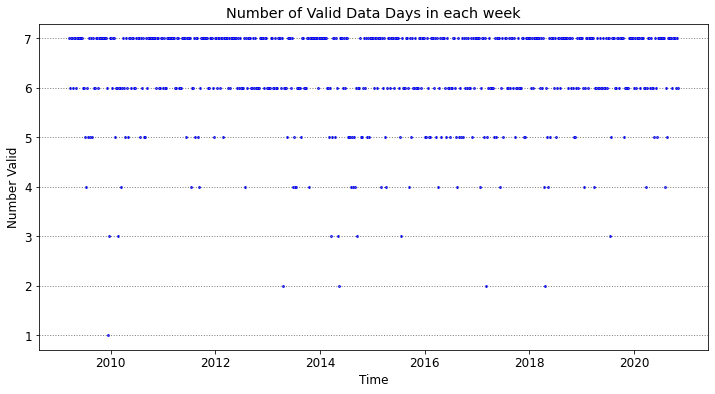

In [34]:
# Number of Data-days in each Week

ax = df_co2.plot.scatter('time','days',c=fit_data_clr,s=3,figsize=(12,6))
# show grid(s)?
plt.grid(axis='y', color='gray', linestyle=':', linewidth=1)
plt.title("Number of Valid Data Days in each week")
plt.ylabel("Number Valid")
plt.xlabel("Time")
plt.show()

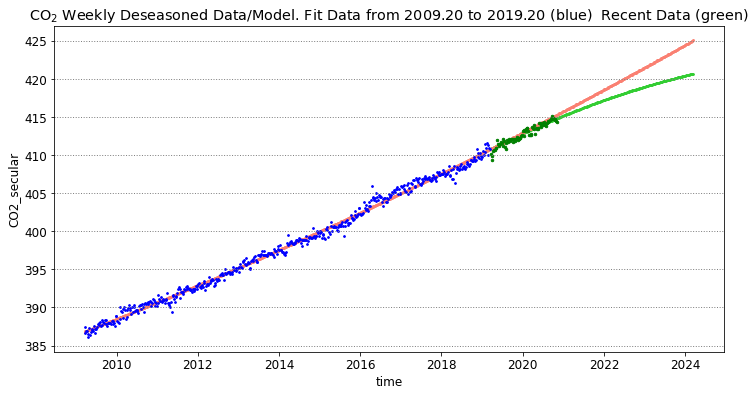

In [42]:
# Trends Plot

# The Secular models
ax = df_co2.plot.scatter('time','BAU_secular',c=bau_model_clr,alpha=0.5,s=3, figsize=(12,6))
df_co2[~fit_rows].plot.scatter('time','SR15_secular',c=sr15_model_clr,s=3,ax=ax)
# BAU on top:
df_co2.plot.scatter('time','BAU_secular',c=bau_model_clr,s=3,ax=ax)

df_co2[fit_rows].plot.scatter('time','CO2_secular',c=fit_data_clr,s=3,ax=ax)
df_co2[~fit_rows].plot.scatter('time','CO2_secular',c=new_data_clr,s=6, ax=ax)
                               ##yerr=resid_std)   # include error bars on new data?

# show grid(s)?
plt.grid(axis='y', color='gray', linestyle=':', linewidth=1)

plt.title("CO$_2$ Weekly Deseasoned Data/Model. Fit Data from {:.2f} to {:.2f} (".format(yr_start, yr_fit) +
         fit_data_clr+")  Recent Data ("+new_data_clr+")")

# plt.savefig("CO2afterGRETA_AllDeseasoned_"+co2_file_date+".png", bbox_inches='tight')
plt.show()

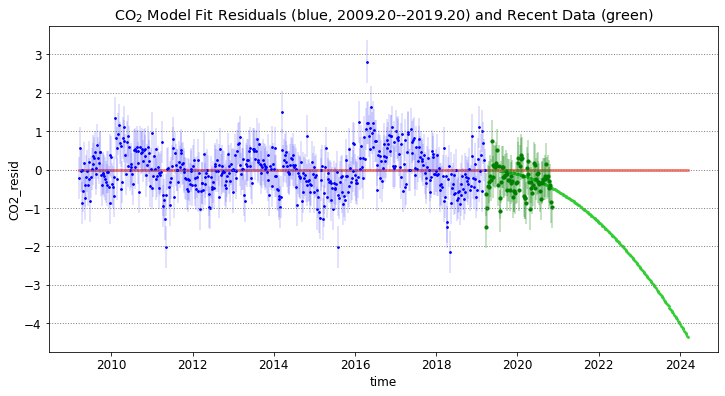

In [43]:
# Residuals Plot

# The residuals between data and model
# Model of the residuals = 0:
ax = df_co2.plot.scatter('time','BAU_resid',c=bau_model_clr,alpha=0.5,s=3, figsize=(12,6))
# Residuals for SR15 model:
df_co2[~fit_rows].plot.scatter('time','SR15_resid',c=sr15_model_clr,s=3,ax=ax)
# BAU on top:
df_co2.plot.scatter('time','BAU_resid',c=bau_model_clr,s=3,ax=ax)

# residuals of fit data
df_co2[fit_rows].plot.scatter('time','CO2_resid',c=fit_data_clr,alpha=0.15,s=1, yerr=resid_std, ax=ax)
df_co2[fit_rows].plot.scatter('time','CO2_resid',c=fit_data_clr,s=3,ax=ax)
# residuals of the new data
df_co2[~fit_rows].plot.scatter('time','CO2_resid',c=new_data_clr,alpha=0.3,s=1, yerr=resid_std, ax=ax)
df_co2[~fit_rows].plot.scatter('time','CO2_resid',c=new_data_clr,s=10, ax=ax)

# show grid(s)?
plt.grid(axis='y', color='gray', linestyle=':', linewidth=1)

plt.title("CO$_2$ Model Fit Residuals ("+fit_data_clr+", {:.2f}--{:.2f}) and Recent Data (".format(
        yr_start, yr_fit) + new_data_clr + ")")

# plt.savefig("CO2afterGRETA_AllResids_"+co2_file_date+".png", bbox_inches='tight')
plt.show()

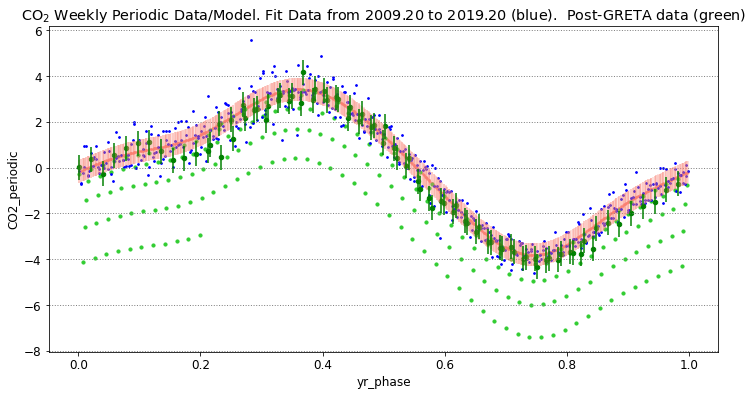

In [44]:
# Periodic Plot

# The periodic model components
ax = df_co2.plot.scatter('yr_phase','BAU_periodic',c=bau_model_clr,alpha=0.5,s=3, figsize=(12,6))
df_co2.plot.scatter('yr_phase','BAU_periodic',c=bau_model_clr,alpha=0.3,s=1,yerr=model_std,ax=ax)
# The SR15 model minus the BAU_secular (only post-GRETA):
df_co2[~fit_rows].plot.scatter('yr_phase','SR15_periodic',c=sr15_model_clr,s=10,ax=ax)

# The fit data points (without secular term)
df_co2[fit_rows].plot.scatter('yr_phase','CO2_periodic',c=fit_data_clr,s=3,ax=ax)
# and the post-GRETA data points
df_co2[~fit_rows].plot.scatter('yr_phase','CO2_periodic',c=new_data_clr,s=6, yerr=resid_std, ax=ax)
df_co2[~fit_rows].plot.scatter('yr_phase','CO2_periodic',c=new_data_clr,s=20,ax=ax)

# show grid(s)?
plt.grid(axis='y', color='gray', linestyle=':', linewidth=1)

plt.title("CO$_2$ Weekly Periodic Data/Model. Fit Data from {:.2f} to {:.2f} (".format(yr_start, yr_fit) +
          fit_data_clr+")." +
          "  Post-GRETA data ("+new_data_clr+")")
plt.show()

### Fancy Plots to Publicize

These are similar to the plots above but made with selected variable ranges.

These plots also have more annotations on the them, which bloats their code. :(

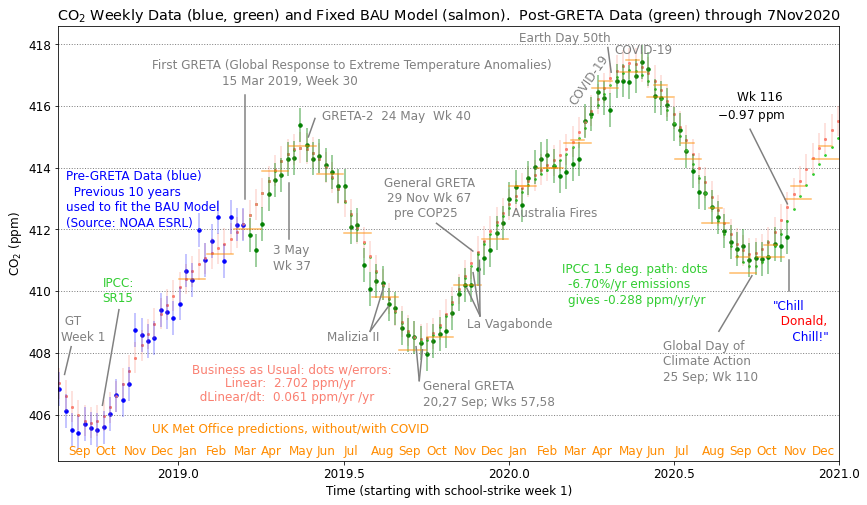

In [50]:
# Plot that focuses on the school-strike weeks through 2020
# Include labels for significant events.

# start with school strike week 1:
yr_plt_start = yr_GTwk1 - 3.5/DAYS_YR
yr_plt_stop = 2021.0

# Model and Data, ppm values 
# show the BAU model
ax = df_co2.plot.scatter('time','BAU_ppm',c=bau_model_clr,s=3,figsize=(14,8),
                         xlim=(yr_plt_start,yr_plt_stop), ylim=(404.5, 418.6))
# with error bars
df_co2.plot.scatter('time','BAU_ppm',c=bau_model_clr,alpha=0.3,s=1,yerr=model_std,ax=ax)

# data used for fitting the model, w/errors
df_co2[fit_rows].plot.scatter('time','CO2_ppm',c=fit_data_clr,alpha=0.3,s=1,yerr=resid_std,ax=ax)
df_co2[fit_rows].plot.scatter('time','CO2_ppm',c=fit_data_clr,s=12,ax=ax)

# new data, w/errors
df_co2[~fit_rows].plot.scatter('time','CO2_ppm',c=new_data_clr,alpha=0.5,yerr=resid_std,s=1, ax=ax)
df_co2[~fit_rows].plot.scatter('time','CO2_ppm',c=new_data_clr,s=12, ax=ax)

# The IPCC SR15 full model
df_co2[~fit_rows].plot.scatter('time','SR15_ppm',c=sr15_model_clr,s=3,ax=ax)
# put BAU on top
df_co2.plot.scatter('time','BAU_ppm',c=bau_model_clr,s=3,ax=ax)


# Show the UK Met Office Monthly average predictions?
if True:
    # Met Office CO2 monthly predictions for 2019 and 2020, from
    # https://www.metoffice.gov.uk/research/climate/seasonal-to-decadal/long-range/forecasts/co2-forecast
    met_monthly = [410.4,411.2,412.0,413.9,414.7,413.8,411.9,409.8,408.1,408.5,410.2,411.7]
    met_year = 2019.00
    for imon, met_ppm in enumerate(met_monthly):
        mon_center = met_year+(imon+0.5)/12.0
        plt.plot([mon_center-0.04, mon_center+0.04],[met_ppm, met_ppm],c=met_ppm_clr,alpha=0.6)
    # The "Revised 2020 forecast without COVID-19 economic impacts"
    met_monthly = [413.4,414.0,414.9,416.8,417.5,416.7,414.8,412.7,411.1,411.5,413.4,414.7]
    met_year = 2020.00
    for imon, met_ppm in enumerate(met_monthly):
        mon_center = met_year+(imon+0.5)/12.0
        plt.plot([mon_center-0.02, mon_center+0.02],[met_ppm, met_ppm],c=met_ppm_clr,alpha=0.6)
    # The "Revised 2020 forecast assuming an 8% reduction in FF emissions following COVID-19"
    met_monthly = [413.4,414.0,414.8,416.6,417.1,416.3,414.3,412.2,410.6,411.1,413.0,414.3]
    met_year = 2020.00
    for imon, met_ppm in enumerate(met_monthly):
        mon_center = met_year+(imon+0.5)/12.0
        plt.plot([mon_center-0.04, mon_center+0.04],[met_ppm, met_ppm],c=met_ppm_clr,alpha=0.6)
    # Annotation for Met Office predictions:
    plt.text(yr_GRETA-0.28, 405.4, "UK Met Office predictions, without/with COVID", color=met_ppm_clr)

# Add month names in some year(s)
for imon, month in enumerate(months):
    if imon > 7:
        plt.text(2018.00+0.0+imon/12.0, 404.7, month,color=met_ppm_clr)
    plt.text(2019.00+0.0+imon/12.0, 404.7, month,color=met_ppm_clr)
    plt.text(2020.00+0.0+imon/12.0, 404.7, month,color=met_ppm_clr)
    
# show grid(s)?
plt.grid(axis='y', color='gray', linestyle=':', linewidth=1)

# title
plt.title("CO$_2$ Weekly Data ("+fit_data_clr+", "+new_data_clr+") and Fixed BAU Model ("+bau_model_clr+"). " +
         " Post-GRETA Data ("+new_data_clr+") through "+co2_file_date)

# First and most recent weeks:

# School Strike week 1
plt.text(yr_GTwk1, 408.9," GT", color="gray")
plt.text(yr_GTwk1, 408.4,"Week 1", color="gray")
plt.plot([yr_GTwk1+0.03, yr_GTwk1+0.01],[408.2,407.3],c="gray")

# Current GT week:
ppm_label = 416.25
yr_label = 2020.67
#
plt.text(yr_label+0.02, ppm_label-0.08,"Wk {}".format(GTwk_newest), color='black') #color=new_data_clr)
plt.plot([yr_newest+0.0, yr_label+0.06],[bau_newest+0.1, ppm_label-1.00],c="gray")
# include the ppm residual value from BaU:
sign_str = "$+$"
if resid_newest < 0.0:
    sign_str = "$-$"
plt.text(yr_label-0.04, ppm_label-0.65, "{}{:.2f} ppm".format(sign_str,abs(resid_newest)),
         color='black') #color=new_data_clr)

# Annotation text for the data, model, etc.

# Data fit for prediction
plt.text(2018.66, 413.6, "Pre-GRETA Data ("+fit_data_clr+")",color=fit_data_clr)
plt.text(2018.66, 413.1, "  Previous {} years".format(int(0.50+yr_fit - yr_start)),color=fit_data_clr)
plt.text(2018.66, 412.6, "used to fit the BAU Model",color=fit_data_clr)
plt.text(2018.66, 412.1, "(Source: NOAA ESRL)",color=fit_data_clr)

# BAU model info
plt.text(yr_GRETA-0.16, 407.35, "Business as Usual: dots w/errors: ", color=bau_model_clr)
plt.text(yr_GRETA-0.06, 406.90, "Linear:  {:.3f} ppm/yr".format(coeffs[0,0]), color=bau_model_clr)
plt.text(yr_GRETA-0.16, 406.45, "  dLinear/dt:  {:.3f} ppm/yr /yr".format(2.0*coeffs[0,1]), color=bau_model_clr)
#
#
# IPCC SR15 model
##plt.plot([2020.45,2020.45],[410.0,410.0],c=sr15_model_clr)
plt.text(2020.20-0.04, 409.7+0.9,"IPCC 1.5 deg. path: dots",color=sr15_model_clr)
plt.text(2020.20-0.02, 409.7+0.40, "{:.2f}%/yr emissions".format(-6.7), color=sr15_model_clr)
plt.text(2020.20-0.02, 409.7-0.10,"gives {:.3f} ppm/yr/yr".format(new_ppmyryr),color=sr15_model_clr)


# Dates/events of note:
# IPCC SR 1.5 released 8 Oct 2018 (day 281)
yr_SR15_pub = 2018.00 + 281.0/DAYS_YR
plt.plot([yr_SR15_pub, yr_SR15_pub+0.05],[406.3,409.40],c="gray")
plt.text(yr_SR15_pub+0.05-0.05, 410.15,"IPCC:",color=sr15_model_clr)
plt.text(yr_SR15_pub+0.05-0.05, 410.15-0.50,"SR15",color=sr15_model_clr)
# The GRETA location
plt.plot([yr_GRETA,yr_GRETA],[413,416.35],c="gray")
plt.text(yr_GRETA-0.08-0.2, 417.2,"First GRETA (Global Response to Extreme Temperature Anomalies)",color="gray")
plt.text(yr_GRETA+0.05-0.12, 416.7,"15 Mar 2019, Week 30", color="gray")
# mini-GRETA (more US and Canada)
plt.plot([yr_GRETA_mini,yr_GRETA_mini],[411.7,413.5],c="gray")
plt.text(yr_GRETA_mini-0.05, 411.2,"3 May", color="gray")
plt.text(yr_GRETA_mini-0.05, 410.7,"Wk 37", color="gray")
# The real GRETA 2:
plt.plot([yr_GRETA_2,yr_GRETA_2+0.02],[415.0,415.6],c="gray")
plt.text(yr_GRETA_2+0.04, 415.55,"GRETA-2  24 May  Wk 40",color="gray")
# Malizia II trip
plt.plot([2019.58, 2019.620],[408.70, 410.1],c="gray")
plt.plot([2019.58, 2019.635],[408.70, 409.5],c="gray")
plt.text(2019.45, 408.40,"Malizia II",color="gray")
# GRETA-General (with Adults) 20-27 Sep 2019
plt.plot([yr_GRETA_General,yr_GRETA_General+3.5/DAYS_YR], [408.2,407.1],c="gray")
plt.plot([yr_GRETA_General+7.0/DAYS_YR,yr_GRETA_General+3.5/DAYS_YR], [408.1,407.1],c="gray")
plt.text(yr_GRETA_General+0.02, 407.0-0.2,"General GRETA", color="gray")
plt.text(yr_GRETA_General+0.02, 407.0-0.7,"20,27 Sep; Wks 57,58", color="gray")
# La Vagabonde ;-)
plt.text(yr_GRETA_COP25 - 14/DAYS_YR - 0.0, 409.3-0.5,"La Vagabonde", color="gray")
plt.plot([yr_GRETA_COP25 - 14/DAYS_YR + 0.04, yr_GRETA_COP25 - 14/DAYS_YR],
         [409.0+0.20, 410.1],c="gray")
plt.plot([yr_GRETA_COP25 - 14/DAYS_YR + 0.04, yr_GRETA_COP25 - 7/DAYS_YR],
         [409.0+0.20, 410.6],c="gray")
plt.plot([yr_GRETA_COP25 - 14/DAYS_YR + 0.04, yr_GRETA_COP25 - 0/DAYS_YR],
         [409.0+0.20, 411.0],c="gray")
# GRETA-General before COP 25 20-27 Sep 2019
plt.plot([yr_GRETA_COP25-0.13,yr_GRETA_COP25-0.02], [412.2,411.3],c="gray")
plt.text(yr_GRETA_COP25-0.29, 413.6-0.2,"General GRETA ", color="gray")
plt.text(yr_GRETA_COP25-0.28, 413.6-0.7,"29 Nov Wk 67", color="gray")
plt.text(yr_GRETA_COP25-0.26, 413.6-1.2,"pre COP25", color="gray") 
# Australia fires, and WEF at Davos
plt.text(2020.01, 412.4,"Australia Fires", color="gray")
# COVID-19 pandemic
plt.text(2020.20, 416.0,"COVID-19", color="gray",
         rotation=55, rotation_mode='anchor')
plt.text(2020.20+0.12, 416.0+1.7,"COVID-19", color="gray",
         rotation=0, rotation_mode='anchor')
# Earth Day 50th
yr_Earth50 = 2020.0 + 113/DAYS_YR
plt.plot([yr_Earth50,yr_Earth50-0.01], [417.1,417.9],c="gray")
plt.text(yr_Earth50-0.13-0.15, 418.0+0.1,"Earth Day 50th", color="gray")
# FaceTheClimateEmergency, 16 July 2020, https://climateemergencyeu.org/
yr_FaceThe = 2020.0 + 198/DAYS_YR
# plt.plot([yr_FaceThe,yr_FaceThe+0.05], [415.5,418.1-0.75],c="gray")
# plt.text(yr_FaceThe+0.0, 418.1,"", color="gray")
# plt.text(yr_FaceThe+0.05, 418.1-0.55,"", color="gray")
# GRETA: Global Day of Climate Action  25 Sept. 2020
plt.plot([yr_GRETA_GDCA, yr_GRETA_GDCA-0.1], [410.5,408.7],c="gray")
plt.text(yr_GRETA_GDCA-0.27, 408.6-0.5,"Global Day of", color="gray")
plt.text(yr_GRETA_GDCA-0.27, 408.6-1.0,"Climate Action", color="gray")
plt.text(yr_GRETA_GDCA-0.27, 408.6-1.5,"25 Sep; Wk 110", color="gray")
# Chill Donald, Chill!  Nov. 5 = day 310
yr_Chill = 2020.0 + 310.0/DAYS_YR
plt.plot([yr_Chill, yr_Chill], [411.0,410.0],c="gray")
plt.text(yr_Chill-0.05, 409.4,'"Chill', color="blue")
plt.text(yr_Chill-0.05, 409.4-0.5,'  Donald,', color="red")
plt.text(yr_Chill-0.05, 409.4-1.0,'     Chill!"', color="blue")


# Future events:


# Friday before COP26(9-19 Nov 2020), COP26 postponed
if False:
    plt.plot([yr_pre_COP26-0.0,yr_pre_COP26-0.0], [413.0,416.5-1.45],c="gray")
    plt.text(yr_pre_COP26-0.06, 416.5-0.2,"Friday", color="gray")
    plt.text(yr_pre_COP26-0.06, 416.5-0.7,"before", color="gray")
    plt.text(yr_pre_COP26-0.06, 416.5-1.2,"COP26", color="gray") 
    plt.plot([yr_pre_COP26-0.05,yr_pre_COP26+0.05], [416.5-0.7+0.12,416.5-0.7+0.12],c="gray")
    plt.plot([yr_pre_COP26-0.05,yr_pre_COP26+0.05], [416.5-1.2+0.13,416.5-1.2+0.13],c="gray")

plt.ylabel("CO$_2$ (ppm)")
plt.xlabel("Time (starting with school-strike week 1)")

# plt.savefig("CO2afterGRETA_weeks_"+co2_file_date+".png", bbox_inches='tight')
plt.show()

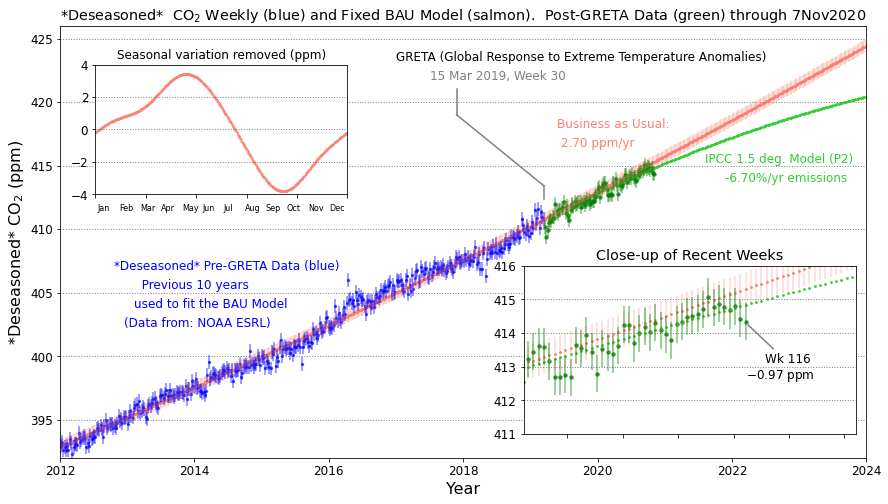

In [51]:
# *Deseasoned* versions of the Model and Data,
# very boring but does show how little change to the BAU trajectory there has been.
# Try adding insert plots to make it more interesting and useful...
# Want mostly to emphasize how consistant the BaU has been.

# year range for the plot:
# Show all the BAU data that is fit
yr_plt_start = 2012.0 #yr_start
# and go 5 years purther
yr_plt_stop = 2024.0

plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'figure.figsize':(14,6)})
fig = plt.figure(1,facecolor='white')
ax = fig.add_axes([0.1, 0.1, 0.8, 1.0])

# show the model
df_co2.plot.scatter('time','BAU_secular',c=bau_model_clr,s=3,
                        xlim=(yr_plt_start,yr_plt_stop), ylim=(392.0, 426.0),ax=ax)
df_co2.plot.scatter('time','BAU_secular',c=bau_model_clr,alpha=0.3,s=1,yerr=model_std,ax=ax)

# data used for fitting
df_co2[fit_rows].plot.scatter('time','CO2_secular',c=fit_data_clr,alpha=0.5,yerr=resid_std,s=1,ax=ax)
df_co2[fit_rows].plot.scatter('time','CO2_secular',c=fit_data_clr,alpha=0.5,s=6, ax=ax)

# new data
df_co2[~fit_rows].plot.scatter('time','CO2_secular',c=new_data_clr,alpha=0.5,yerr=resid_std,s=1,ax=ax)
df_co2[~fit_rows].plot.scatter('time','CO2_secular',c=new_data_clr,alpha=0.7,s=12, ax=ax)

# The SR15 secular trend
df_co2[~fit_rows].plot.scatter('time','SR15_secular',c=sr15_model_clr,s=3,ax=ax)
# BAU on top
df_co2.plot.scatter('time','BAU_secular',c=bau_model_clr,s=3,ax=ax)

# show grid(s)?
plt.grid(axis='y', color='gray', linestyle=':', linewidth=1)
#
plt.title("*Deseasoned*  CO$_2$ Weekly ("+fit_data_clr+") and Fixed BAU Model ("+bau_model_clr+"). " +
         " Post-GRETA Data ("+new_data_clr+") through "+co2_file_date)

# Data fit for prediction
plt.text(2012.8, 406.8, "*Deseasoned* Pre-GRETA Data ("+fit_data_clr+")",color=fit_data_clr)
plt.text(2012.8+0.3, 405.3, "  Previous {} years".format(int(0.50+yr_fit - yr_start)),color=fit_data_clr)
plt.text(2012.8+0.3, 403.8, "used to fit the BAU Model",color=fit_data_clr)
plt.text(2012.8+0.15, 402.3, "(Data from: NOAA ESRL)",color=fit_data_clr)

# The GRETA location
plt.plot([2017.9, 2017.9], [421.0, 419.0], c="gray")
plt.plot([yr_GRETA, 2017.9], [413.4, 419.0], c="gray")
plt.plot([yr_GRETA, yr_GRETA], [413.4, 412.4], c="gray")
plt.text(2017.0, 423.3,"GRETA (Global Response to Extreme Temperature Anomalies)",color="black")
plt.text(2017.0+0.5, 421.8,"15 Mar 2019, Week 30", color="gray")

# BAU model info
plt.text(2019.4, 418.00, "Business as Usual: ", color=bau_model_clr)
plt.text(2019.4, 416.50, " {:.2f} ppm/yr".format(coeffs[0,0]), color=bau_model_clr)
##plt.text(2015, 415.50, "  dLinear/dt:  {:.3f} ppm/yr /yr".format(2.0*coeffs[0,1]), color=bau_model_clr)
plt.ylabel("*Deseasoned* CO$_2$ (ppm)",size=16)
plt.xlabel("Year",size=16)

# IPCC SR15 model
#plt.plot([2020.74,2020.74],[409.5,41],c=sr15_model_clr)
plt.text(2021.6, 415.2,"IPCC 1.5 deg. Model (P2)",color=sr15_model_clr)
plt.text(2021.6+0.3, 413.7, "{:.2f}%/yr emissions".format(-6.7), color=sr15_model_clr)
##plt.text(2021-0.20, 410.5,"gives {:.3f} ppm/yr/yr".format(new_ppmyryr),color=sr15_model_clr)


# Add an inset figure -- Seasonal Variation
# params are [left, bottom, width, height] in fractions of figure size 
ax = fig.add_axes([0.135, 0.71, 0.25, 0.3])
df_co2.plot.scatter('yr_phase','BAU_periodic',c=bau_model_clr,alpha=0.35,s=3,
                        xlim=(0.0,1.0), ylim=(-4,4),ax=ax)
##df_co2.plot.scatter('yr_phase','BAU_periodic',c=bau_model_clr,alpha=0.10,s=1,yerr=model_std,ax=ax)
plt.xlabel("")
ax.set_xticklabels([])
plt.ylabel("")
plt.title("Seasonal variation removed (ppm)",size=12)
plt.grid(axis='y', color='gray', linestyle=':', linewidth=1)
# Add month names
for imon, month in enumerate(months):
    plt.text(0.01+imon/12.0, -5.0, month,color='black',size=8)

    
# Add an inset figure -- Close-up
# params are [left, bottom, width, height] in fractions of figure size 
ax = fig.add_axes([0.56, 0.155, 0.33, 0.39])
# show the model
df_co2.plot.scatter('time','BAU_secular',c=bau_model_clr,s=3,
                        ##xlim=(yr_GTwk1-0.02, yr_newest+0.25), ylim=(408.5,413.9),ax=ax)
                        xlim=(yr_newest-0.80, yr_newest+0.40), 
                    ylim=(411.0,416.0),ax=ax)
df_co2.plot.scatter('time','BAU_secular',c=bau_model_clr,alpha=0.3,s=1,yerr=model_std,ax=ax)
# data used for fitting
df_co2[fit_rows].plot.scatter('time','CO2_secular',c=fit_data_clr,alpha=0.5,yerr=resid_std,s=1,ax=ax)
df_co2[fit_rows].plot.scatter('time','CO2_secular',c=fit_data_clr,alpha=0.5,s=6, ax=ax)
# new data
df_co2[~fit_rows].plot.scatter('time','CO2_secular',c=new_data_clr,alpha=0.5,yerr=resid_std,s=1,ax=ax)
df_co2[~fit_rows].plot.scatter('time','CO2_secular',c=new_data_clr,alpha=0.7,s=12, ax=ax)
# The SR15 secular trend
df_co2[~fit_rows].plot.scatter('time','SR15_secular',c=sr15_model_clr,s=3,ax=ax)
#
# current GT week:
plt.text(yr_newest+0.07, secular_newest-1.2,"Wk {}".format(GTwk_newest), color='black')  #new_data_clr)
plt.plot([yr_newest+0.01, yr_newest+0.10],[secular_newest-0.1,secular_newest-0.8],c="gray")
# include the ppm residual value from BaU:
sign_str = "$+$"
if resid_newest < 0.0:
    sign_str = "$-$"
plt.text(yr_newest-0.0, secular_newest-1.7, "{}{:.2f} ppm".format(sign_str,abs(resid_newest)),
         color='black')  #new_data_clr)
#
plt.grid(axis='y', color='gray', linestyle=':', linewidth=1)
plt.xlabel("")
ax.set_xticklabels([])
plt.ylabel("")
plt.title("Close-up of Recent Weeks")


# plt.savefig("CO2afterGRETA_deseason_"+co2_file_date+".png", bbox_inches='tight')
plt.show()

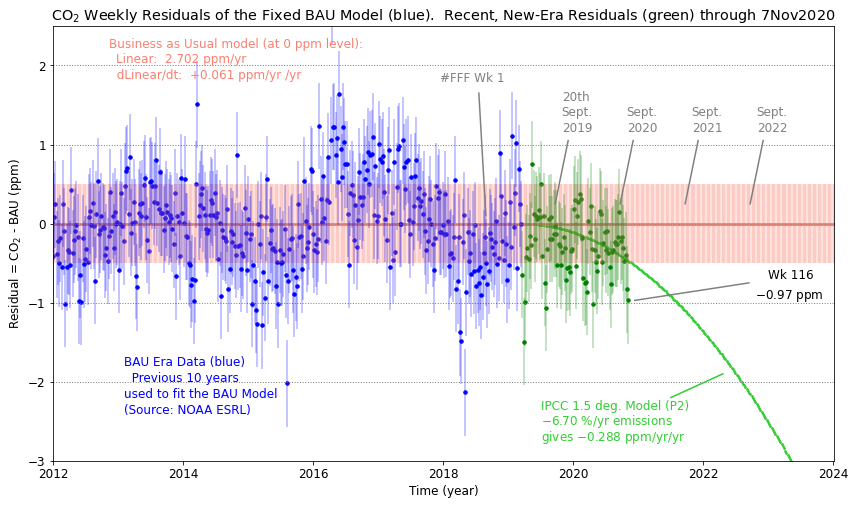

In [52]:
# Model and Data RESIDUALS

# start full 10 years pre-GRETA:
yr_plt_start = 2011.99  #2009.2
# end the plot at:
yr_plt_stop = 2024.01  #yr_GRETA + 5.0

# show the models residuals
ax = df_co2.plot.scatter('time','BAU_resid',c=bau_model_clr,s=3, figsize=(14,8),
                        xlim=(yr_plt_start,yr_plt_stop), ylim=(-3.0,2.5))
df_co2.plot.scatter('time','BAU_resid',c=bau_model_clr,alpha=0.3,s=1,yerr=model_std,ax=ax)

# Residuals for SR15 model:
df_co2[~fit_rows].plot.scatter('time','SR15_resid',c=sr15_model_clr,s=3,ax=ax)
# Put BAU on top
df_co2.plot.scatter('time','BAU_resid',c=bau_model_clr,s=3,ax=ax)
                    
# data used for fitting
df_co2[fit_rows].plot.scatter('time','CO2_resid',c=fit_data_clr,alpha=0.3,yerr=resid_std,s=1,ax=ax)
df_co2[fit_rows].plot.scatter('time','CO2_resid',c=fit_data_clr,s=12, ax=ax)

# new data
df_co2[~fit_rows].plot.scatter('time','CO2_resid',c=new_data_clr,alpha=0.3,yerr=resid_std,s=1,ax=ax)
df_co2[~fit_rows].plot.scatter('time','CO2_resid',c=new_data_clr,s=12, ax=ax)


# show grid(s)?
plt.grid(axis='y', color='gray', linestyle=':', linewidth=1)
#
plt.title("CO$_2$ Weekly Residuals of the Fixed BAU Model ("+fit_data_clr+"). " +
         " Recent, New-Era Residuals ("+new_data_clr+") through "+co2_file_date)

# Most recent data point
plt.plot([yr_newest+0.10, 2022.7], [resid_newest, -0.75], c='gray')
plt.text(2022.8+0.2, -0.70, "Wk {}".format(GTwk_newest),color='black') #color=new_data_clr)
# include the ppm residual value from BaU:
sign_str = "$+$"
if resid_newest < 0.0:
    sign_str = "$-$"
plt.text(2022.8, -0.95, "{}{:.2f} ppm".format(sign_str,abs(resid_newest)),
         color='black') #color=new_data_clr)

# Data fit for prediction
plt.text(yr_plt_start+1.10, -1.80, "BAU Era Data ("+fit_data_clr+")",color=fit_data_clr)
plt.text(yr_plt_start+1.10, -2.00, "  Previous {} years".format(int(0.50+yr_fit - yr_start)),color=fit_data_clr)
plt.text(yr_plt_start+1.10, -2.20, "used to fit the BAU Model",color=fit_data_clr)
plt.text(yr_plt_start+1.10, -2.40, "(Source: NOAA ESRL)",color=fit_data_clr)

# school strike week 1
plt.text(yr_GTwk1-0.7, 1.8,"#FFF Wk 1", color="gray")
plt.plot([yr_GTwk1-0.1, yr_GTwk1+0.008],[1.65,0.1],c="gray")

# GRETA-General (with Adults)
# 2019 and future minima in Sept:
plt.text(yr_GRETA_General+0.1, 1.56,"20th", color="gray")
for yr_sept in [0,1,2,3]:
    plt.plot([yr_GRETA_General+yr_sept,yr_GRETA_General+0.2+yr_sept],[0.25,1.05],c="gray")
    plt.text(yr_GRETA_General+0.1+yr_sept, 1.36,"Sept.", color="gray")
    plt.text(yr_GRETA_General+0.1+yr_sept, 1.16,str(2019+yr_sept), color="gray")

# BAU model info
plt.text(yr_plt_start+1.0-0.13, 2.23, "Business as Usual model (at 0 ppm level): ", color=bau_model_clr)
plt.text(yr_plt_start+1.0-0.03, 2.03, "Linear:  {:.3f} ppm/yr".format(coeffs[0,0]), color=bau_model_clr)
plt.text(yr_plt_start+1.0-0.13, 1.83, "  dLinear/dt:  +{:.3f} ppm/yr /yr".format(2.0*coeffs[0,1]), color=bau_model_clr)

# IPCC SR15 model
plt.plot([2021.50,2022.30],[-2.2,-1.9],c=sr15_model_clr)
plt.text(2019.50, -2.35,"IPCC 1.5 deg. Model (P2)",color=sr15_model_clr)
plt.text(2019.50, -2.55, "${:.2f}$ %/yr emissions".format(-6.7), color=sr15_model_clr)
plt.text(2019.50, -2.75,"gives ${:.3f}$ ppm/yr/yr".format(new_ppmyryr),color=sr15_model_clr)

plt.ylabel("Residual = CO$_2$ - BAU (ppm)")
plt.xlabel("Time (year)")

# plt.savefig("CO2afterGRETA_resids_"+co2_file_date+".png", bbox_inches='tight')
plt.show()

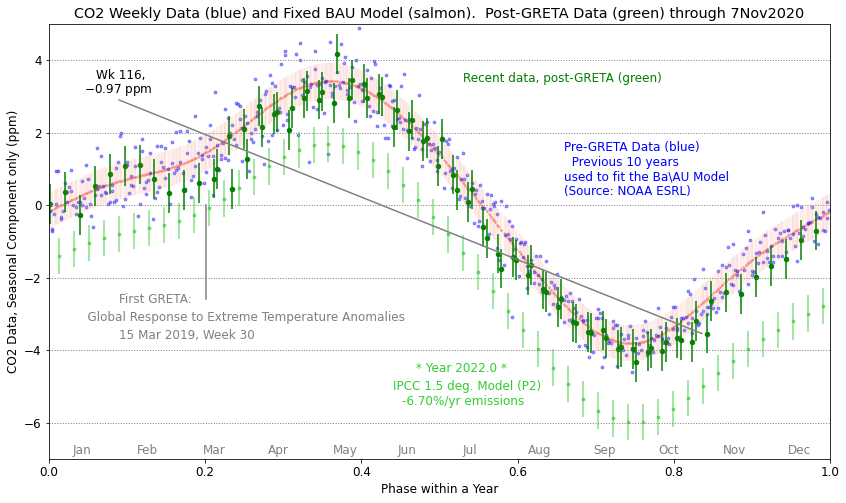

In [53]:
# Model and Data PERIODIC component
# show the model
ax = df_co2.plot.scatter('yr_phase','BAU_periodic',c=bau_model_clr,alpha=0.35,s=3, figsize=(14,8),
                        xlim=(0.0,1.0), ylim=(-7,5))
df_co2.plot.scatter('yr_phase','BAU_periodic',c=bau_model_clr,alpha=0.10,s=1,yerr=model_std,ax=ax)
# the SR15 model_periodic = SR15_ppm - BAU_secular
# just show it for one year:
#
yr_periodic = 2022.0
periodic_rows = (df_co2['time'] > yr_periodic) & (df_co2['time'] < 1.0+yr_periodic)
df_co2[periodic_rows].plot.scatter('yr_phase','SR15_periodic',c=sr15_model_clr,
                                   alpha=0.6,s=8,yerr=model_std,ax=ax)

# data used for fitting
df_co2[fit_rows].plot.scatter('yr_phase','CO2_periodic',c=fit_data_clr,alpha=0.4, s=8, ax=ax)

# new data
df_co2[~fit_rows].plot.scatter('yr_phase','CO2_periodic',c=new_data_clr,alpha=1.0,yerr=resid_std,s=2,ax=ax)
df_co2[~fit_rows].plot.scatter('yr_phase','CO2_periodic',c=new_data_clr,s=20, ax=ax)

# current GT week:
plt.text(0.06, 3.50,"Wk {},".format(GTwk_newest), color='black')  #new_data_clr)
plt.plot([phase_newest-0.007, 0.09],[periodic_newest, 2.9],c="gray")
# include the ppm residual value from BaU:
sign_str = "$+$"
if resid_newest < 0.0:
    sign_str = "$-$"
plt.text(0.06-0.015, 3.10, "{}{:.2f} ppm".format(sign_str,abs(resid_newest)),
         color='black')  #new_data_clr)

# The (first) GRETA location
phase_GRETA = yr_GRETA - int(yr_GRETA)
plt.plot([phase_GRETA, phase_GRETA], [-2.6, 0.0], c="gray")
plt.text(0.03+0.06, -2.7,"First GRETA:",color="gray")
plt.text(0.03, -3.2,"    Global Response to Extreme Temperature Anomalies",color="gray")
plt.text(0.03+0.06, -3.7,"15 Mar 2019, Week 30", color="gray")

# Data fit for prediction
plt.text(0.66, 1.5, "Pre-GRETA Data ("+fit_data_clr+")",color=fit_data_clr)
plt.text(0.66, 1.5-0.4, "  Previous {} years".format(int(0.50+yr_fit - yr_start)),color=fit_data_clr)
plt.text(0.66, 1.5-0.8, "used to fit the Ba\AU Model",color=fit_data_clr)
plt.text(0.66, 1.5-1.2, "(Source: NOAA ESRL)",color=fit_data_clr)

# Data added since GRETA
plt.text(0.53, 3.4, "Recent data, post-GRETA ("+new_data_clr+")",color=new_data_clr)

# IPCC SR15 model
plt.text(0.47+0.00, -4.6+0.0,"* Year {} *".format(yr_periodic),color=sr15_model_clr)
plt.text(0.47-0.03, -4.6-0.5,"IPCC 1.5 deg. Model (P2)",color=sr15_model_clr)
plt.text(0.47-0.018, -4.6-0.9, "{:.2f}%/yr emissions".format(-6.7), color=sr15_model_clr)
##plt.text(0.20-0.018, -4.6-1.2,"gives {:.3f} ppm/yr/yr".format(new_ppmyryr),color=sr15_model_clr)

# Add month names
for imon, month in enumerate(months):
    plt.text(0.03+imon/12.0, -6.85, month,color='gray')

# show grid(s)?
plt.grid(axis='y', color='gray', linestyle=':', linewidth=1)
   
plt.title("CO2 Weekly Data ("+fit_data_clr+") and Fixed BAU Model ("+bau_model_clr+"). " +
         " Post-GRETA Data ("+new_data_clr+") through "+co2_file_date)

plt.ylabel("CO2 Data, Seasonal Component only (ppm)")
plt.xlabel("Phase within a Year")

# plt.savefig("CO2afterGRETA_seasonal_"+co2_file_date+".png", bbox_inches='tight')
plt.show()

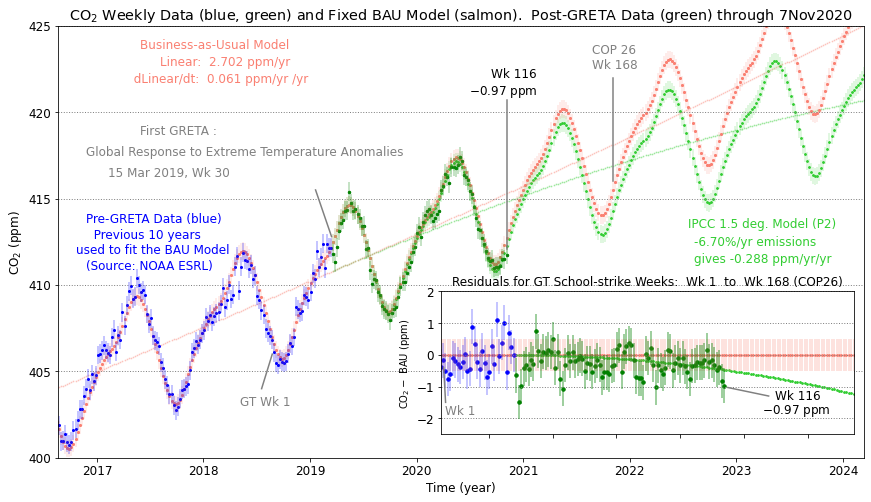

In [54]:
# Larger-range view of CO2 values
# 

# start 2 years before school strike week 1:
yr_plt_start = yr_GTwk1 - 3.5/DAYS_YR - 2.0
yr_plt_stop = yr_GRETA+5.0

plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'figure.figsize':(14,6)})
fig = plt.figure(1,facecolor='white')
ax = fig.add_axes([0.1, 0.1, 0.8, 1.0])


df_co2.plot.scatter('time','BAU_ppm',c=bau_model_clr,s=3,
                        xlim=(yr_plt_start,yr_plt_stop), ylim=(400.0, 425.0),ax=ax)
# The SR15 secular trend
df_co2[~fit_rows].plot.scatter('time','SR15_secular',c=sr15_model_clr,s=1,ax=ax, alpha=0.3)
# The SR15 full model
df_co2[~fit_rows].plot.scatter('time','SR15_ppm',c=sr15_model_clr,s=1,alpha=0.2,ax=ax,yerr=model_std)
df_co2[~fit_rows].plot.scatter('time','SR15_ppm',c=sr15_model_clr,s=3,ax=ax)
# BAU on top
df_co2.plot.scatter('time','BAU_secular',c=bau_model_clr,s=1,ax=ax, alpha=0.3)
df_co2.plot.scatter('time','BAU_ppm',c=bau_model_clr,s=1,alpha=0.2,ax=ax,yerr=model_std)
df_co2.plot.scatter('time','BAU_ppm',c=bau_model_clr,s=3,ax=ax)

# data used for fitting
df_co2[fit_rows].plot.scatter('time','CO2_ppm',c=fit_data_clr,alpha=0.3,yerr=resid_std,s=1,ax=ax)
df_co2[fit_rows].plot.scatter('time','CO2_ppm',c=fit_data_clr,s=4,ax=ax)

# new data
df_co2[~fit_rows].plot.scatter('time','CO2_ppm',c=new_data_clr,s=1, yerr=resid_std,alpha=0.3, ax=ax)
df_co2[~fit_rows].plot.scatter('time','CO2_ppm',c=new_data_clr,s=6, ax=ax)

# Data fit for prediction
plt.text(2016.9, 413.6, "Pre-GRETA Data ("+fit_data_clr+")",color=fit_data_clr)
plt.text(2016.9, 413.6-0.9, "  Previous {} years".format(int(0.50+yr_fit - yr_start)),color=fit_data_clr)
plt.text(2016.9-0.1, 413.6-1.8, "used to fit the BAU Model",color=fit_data_clr)
plt.text(2016.9, 413.6-2.7, "(Source: NOAA ESRL)",color=fit_data_clr)

# GT week 1
plt.plot([yr_GTwk1-0.10,yr_GTwk1],[404,406],c="gray")
plt.text(yr_GTwk1-0.30, 403.0,"GT Wk 1", color="gray")

# The GRETA location
plt.plot([yr_GRETA,yr_GRETA-0.15],[412.8, 416.0-0.5],c="gray")
plt.text(yr_GRETA-1.8, 416.0+2.70,"First GRETA :",color="gray")
plt.text(yr_GRETA-2.3, 416.0+1.50,"Global Response to Extreme Temperature Anomalies",color="gray")
plt.text(yr_GRETA-2.1, 416.0+0.30,"15 Mar 2019, Wk 30", color="gray")

# BAU model info
plt.text(2017.4, 423.7, "Business-as-Usual Model", color=bau_model_clr)
plt.text(2017.4+0.19, 423.7-1.0, "Linear:  {:.3f} ppm/yr".format(coeffs[0,0]), color=bau_model_clr)
plt.text(2017.4-0.13, 423.7-2.0, "  dLinear/dt:  {:.3f} ppm/yr /yr".format(2.0*coeffs[0,1]), color=bau_model_clr)

# IPCC SR15 model
plt.text(2022.55, 413.30,"IPCC 1.5 deg. Model (P2)",color=sr15_model_clr)
plt.text(2022.55+0.05, 412.30, "{:.2f}%/yr emissions".format(-6.7), color=sr15_model_clr)
plt.text(2022.55+0.05, 411.30,"gives {:.3f} ppm/yr/yr".format(new_ppmyryr),color=sr15_model_clr)

# current GT week:
plt.plot([yr_newest, yr_newest],[421.0-0.3, ppm_newest+0.3],c="gray")
plt.text(yr_newest-0.15, 421.0+1.0, "Wk {}".format(GTwk_newest), color='black') #color=new_data_clr)
sign_str = "$+$"
if resid_newest < 0.0:
    sign_str = "$-$"
plt.text(yr_newest-0.35, 421.0,"{}{:.2f} ppm".format(sign_str,abs(resid_newest)),
         color='black') #color=new_data_clr)

# COP26 1(Mon)-12(Fri) November 2021
# Friday near middle of COP26, 5 Nov 2021, day 309
GTwk_COP26 = 168
yr_COP26 = 2021.0 + (309.0-0.5)/DAYS_YR
# BAU = 415.53  SR15 = 414.31
plt.text(yr_COP26-0.2, 422.5, "COP 26\nWk {}".format(GTwk_COP26), color='gray')
plt.plot([yr_COP26, yr_COP26],[415.53+0.5, 422.0],c="gray")

# show grid(s)?
plt.grid(axis='y', color='gray', linestyle=':', linewidth=1)
plt.ylabel("CO$_2$ (ppm)")
plt.xlabel("Time (year)")
##plt.title("CO$_2$ Weekly Data and Fixed Future Models." +
##         "  Post-GRETA Data ("+new_data_clr+") through "+co2_file_date)
plt.title("CO$_2$ Weekly Data ("+fit_data_clr+", "+new_data_clr+") and Fixed BAU Model ("+bau_model_clr+"). " +
         " Post-GRETA Data ("+new_data_clr+") through "+co2_file_date)



# Add an inset figure -- Residuals
# params are [left, bottom, width, height] in fractions of figure size 
ax = fig.add_axes([0.48, 0.155, 0.41, 0.33])

# show the models residuals
df_co2.plot.scatter('time','BAU_resid',c=bau_model_clr,s=3,
                    ##xlim=(yr_GTwk1-0.02, yr_newest+0.5),ylim=(-2.5,2.0),ax=ax)
                    xlim=(yr_GTwk1-0.02, yr_COP26+0.02),ylim=(-2.5,2.0),ax=ax)  # end at COP26
df_co2.plot.scatter('time','BAU_resid',c=bau_model_clr,alpha=0.3,s=1,yerr=model_std,ax=ax)

# Residuals for SR15 model:
df_co2[~fit_rows].plot.scatter('time','SR15_resid',c=sr15_model_clr,s=3,ax=ax)

# data used for fitting
df_co2[fit_rows].plot.scatter('time','CO2_resid',c=fit_data_clr,alpha=0.3,yerr=resid_std,s=1,ax=ax)
df_co2[fit_rows].plot.scatter('time','CO2_resid',c=fit_data_clr,s=12, ax=ax)

# new data
df_co2[~fit_rows].plot.scatter('time','CO2_resid',c=new_data_clr,alpha=0.5,yerr=resid_std,s=1,ax=ax)
df_co2[~fit_rows].plot.scatter('time','CO2_resid',c=new_data_clr,s=12, ax=ax)

# First GT week:
plt.text(yr_GTwk1+0.01, -1.9,"Wk {}".format(1), color="gray")   #fit_data_clr)
plt.plot([yr_GTwk1, yr_GTwk1+0.015],[-0.4,-1.5],c="gray")

# Most recent GT week:
annot_resid = -1.4
plt.text(yr_newest+0.40, annot_resid,"Wk {}".format(GTwk_newest), color='black')  #new_data_clr)
sign_str = "$+$"
if resid_newest < 0.0:
    sign_str = "$-$"
plt.text(yr_newest+0.30, annot_resid-0.4-0.05,"{}{:.2f} ppm".format(sign_str,abs(resid_newest)),
         color='black')  #new_data_clr)
plt.plot([yr_newest+0.03, yr_newest+0.35],[resid_newest-0.06,annot_resid+0.1],c="gray")

plt.grid(axis='y', color='gray', linestyle=':', linewidth=1)
plt.xlabel("",size=10)
ax.set_xticklabels([])
plt.ylabel("CO$_2 -$ BAU (ppm)", size=10)
plt.title("Residuals for GT School-strike Weeks:  Wk 1  to  Wk 168 (COP26)",size=12)

# plt.savefig("CO2afterGRETA_future_"+co2_file_date+".png", bbox_inches='tight')
plt.show()

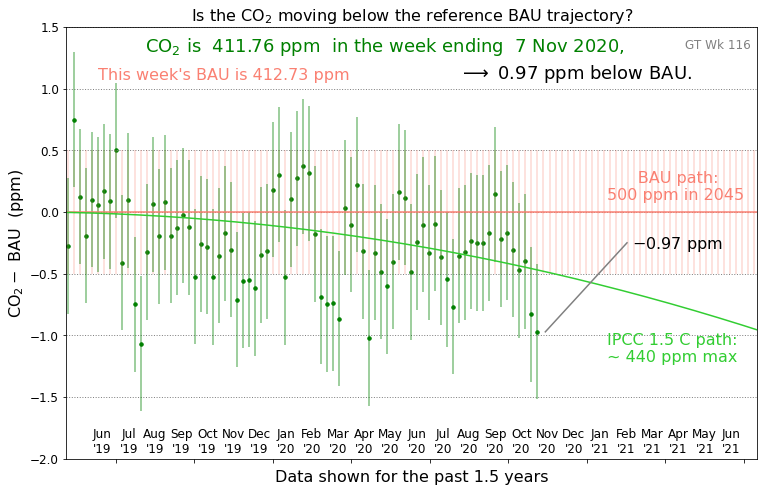


Most recent data point is (2020.84, 411.76) for GT week 116.
-0.97 ppm from current BAU (412.73).


In [56]:
# Simplified figure showing where we are compared to BAU and IPCC
# Plotted over the near past/future:  * Too zoomed in to be useful? *
yr_plt_start = yr_newest - 1.5
yr_plt_stop = yr_newest + 0.7

plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'figure.figsize':(12,6)})
fig = plt.figure(1,facecolor='white')
ax = fig.add_axes([0.1, 0.1, 0.8, 1.0])

# Show the BaU model line with errors size indicated
df_co2.plot('time','BAU_resid',c=bau_model_clr,legend=None,
                    xlim=(yr_plt_start, yr_plt_stop),ylim=(-2.0,1.5),ax=ax)
df_co2.plot.scatter('time','BAU_resid',c=bau_model_clr,alpha=0.3,s=1,yerr=model_std,ax=ax)

# The IPCC SR15 model line:
df_co2.plot('time','SR15_resid',c=sr15_model_clr,legend=None,
                    xlim=(yr_plt_start, yr_plt_stop),ax=ax)


# data used for fitting (not in this range)
##df_co2[fit_rows].plot.scatter('time','CO2_resid',c=fit_data_clr,alpha=0.3,yerr=resid_std,s=1,ax=ax)
##df_co2[fit_rows].plot.scatter('time','CO2_resid',c=fit_data_clr,s=12, ax=ax)

# new data
df_co2[~fit_rows].plot.scatter('time','CO2_resid',c=new_data_clr,alpha=0.5,yerr=resid_std,s=1,ax=ax)
df_co2[~fit_rows].plot.scatter('time','CO2_resid',c=new_data_clr,s=12, ax=ax)

# Add month names in the previous, current, next years
y_months = -1.95
for year_offset in [-1.0,0.0,1.0]:
    for imon, month in enumerate(months):
        x_month = int(yr_newest) + year_offset + 0.0417+imon/12.0
        if (x_month > (yr_plt_start + 0.0417)) and (x_month < (yr_plt_stop - 0.0417)):
            month_str = month+"\n'"+str(int(x_month-2000))
            plt.text(x_month, y_months, month_str, color='black',
                horizontalalignment='center',fontsize=12)

# First GT week:
##plt.text(yr_GTwk1+0.01, -1.9,"Wk {}".format(1), color=fit_data_clr)
##plt.plot([yr_GTwk1, yr_GTwk1+0.015],[-0.4,-1.5],c="gray")

# Label the most recent value:
annot_resid = -0.30
sign_str = "$+$"
if resid_newest < 0.0:
    sign_str = "$-$"
plt.text(yr_newest+0.30, annot_resid,"{}{:.2f} ppm".format(sign_str,abs(resid_newest)),
         color='black', fontsize=16)
plt.plot([yr_newest+0.025, yr_newest+0.30-0.015],
         [resid_newest,annot_resid+0.05],c="gray")

# Label with the key information
info_string = ("CO$_2$ is  {:.2f} ppm  in the week ending  ".format(ppm_newest) +
          co2_file_date[:-7]+" "+co2_file_date[-7:-4]+" "+co2_file_date[-4:]+",")
plt.text(yr_newest - 1.25, 1.30, info_string, color=new_data_clr, fontsize=18)

# State the relation to BAU:
abovebelow = 'below'
if resid_newest > 0:
    abovebelow = 'above'
rel_bau_string = ("$ \\longrightarrow $ {:.2f} ppm ".format(abs(resid_newest)) + 
                  abovebelow + " BAU.")
plt.text(yr_newest - 0.25, 1.08, rel_bau_string, color='black', fontsize=18)

# Include the GT week
plt.text( yr_newest+0.47, 1.32, "GT Wk {}".format(GTwk_newest),color='gray',fontsize=12)

# Current BaU ppm for reference
plt.text(yr_newest-1.40, 1.07, "This week's BAU is {:.2f} ppm".format(bau_newest),
         color=bau_model_clr, fontsize=16)

# Label the Bau and IPCC curves
plt.text(yr_newest+0.22, 0.10, "      BAU path:\n500 ppm in 2045",
         color=bau_model_clr, fontsize=16)
# Usually just manually adjust the annotation positions, but here for fun,
# adjust the y location based on where the IPCC curve leaves the plot:
sr15_at_end = df_co2['SR15_resid'].where(df_co2['time'] > yr_plt_stop).max()
plt.text(yr_newest+0.22, sr15_at_end-0.25, "IPCC 1.5 C path:\n~ 440 ppm max",
         color=sr15_model_clr, fontsize=16)


# Plot title
plt.title("Is the CO$_2$ moving below the reference BAU trajectory?", size=16)

# Plot grid and labels
plt.grid(axis='y', color='gray', linestyle=':', linewidth=1)
plt.xlabel("Data shown for the past 1.5 years", size=16)
ax.set_xticklabels([])
plt.ylabel("CO$_2 -$ BAU  (ppm)", size=16)


# plt.savefig("CO2afterGRETA_simple_"+co2_file_date+".png", bbox_inches='tight')
plt.show()

# Repeat of the newest information
print("\nMost recent data point is ("+
      "{:.2f}, {:.2f}) for GT week {}.".format(yr_newest, ppm_newest, GTwk_newest))
print("{:.2f} ppm from current BAU ({:.2f}).".format(resid_newest,bau_newest))